In [2]:
import xlrd

import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

# Input parameters for the search

In [3]:
loadpath="cne24114-sup-0002-SuppTab1.xlsx"
savepath="/home/sriram/ncbs/analysis_codes/zebrafish_cerebellum_gene_expression/plots/"

#Whether to save the plots or not
save=False

"""SEARCH PARAMETERS"""
#String to search for
search_for='ppp1r1'

#Toggle case sensitivity on or off
case_sensitive=False

begin_with=True # if True, the query is matched to the start of the gene names
#if False, the query is matched to anywhere in the gene name where it is present without break

exact_letter_match = False #Exact match of only the letters in the gene name
# Looks for a continous match of letters (not numbers) without spaces or breaks anywhere
#in the gene name


# Load data

In [4]:
workbook = xlrd.open_workbook(loadpath)
worksheet = workbook.sheet_by_index(0)

num_cols = worksheet.ncols
num_rows = worksheet.nrows

column_index_sym=1
Gene_Sym=[]


for i in range(3,num_rows-1):
    n=worksheet.cell(i,column_index_sym).value
    Gene_Sym.append(n)

# Search and plot

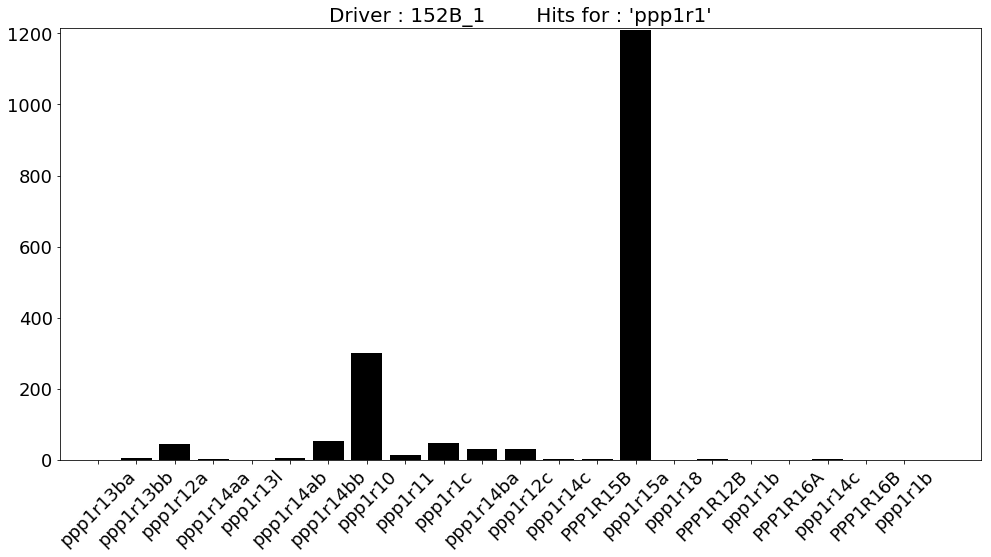

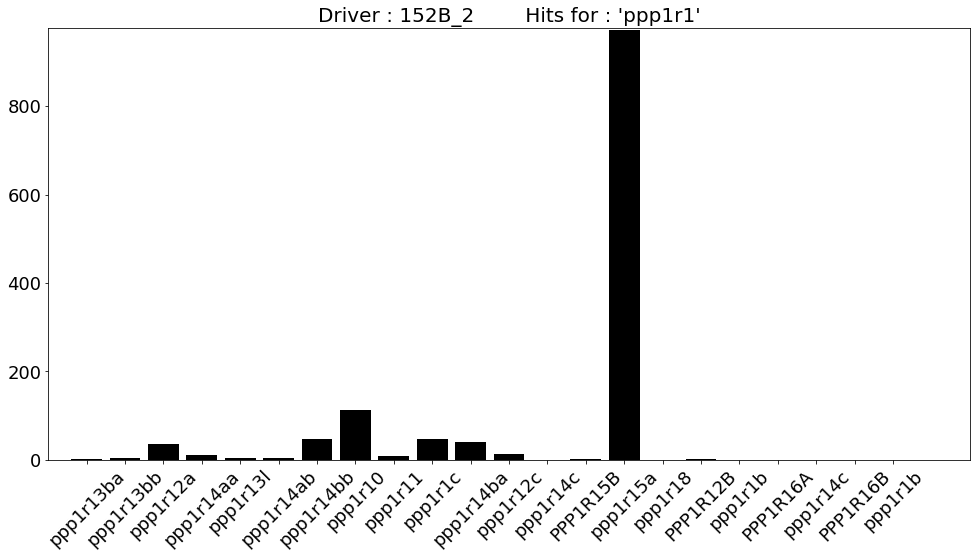

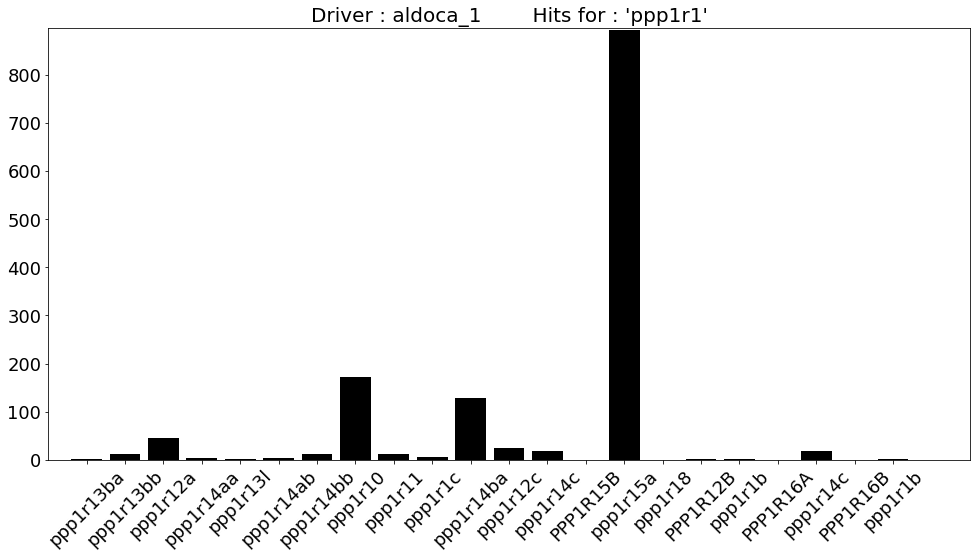

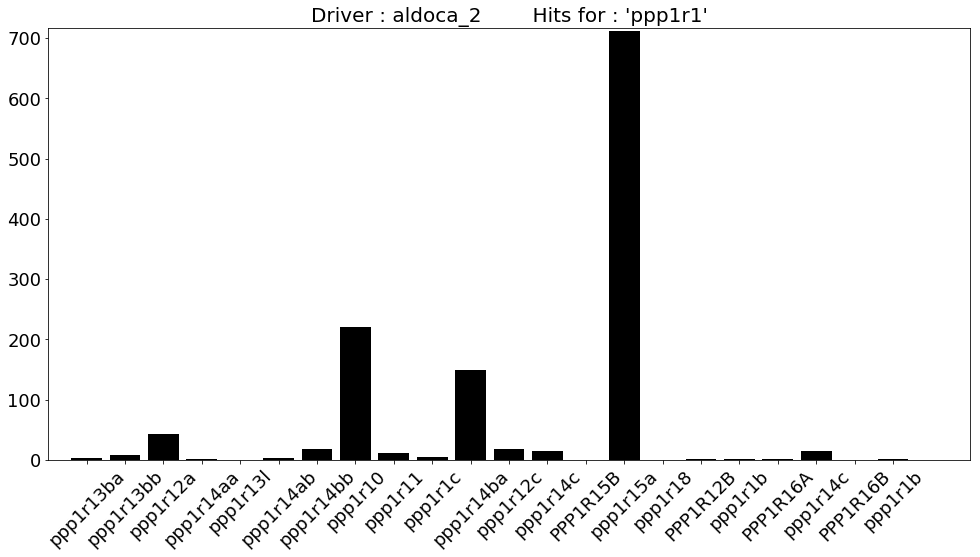

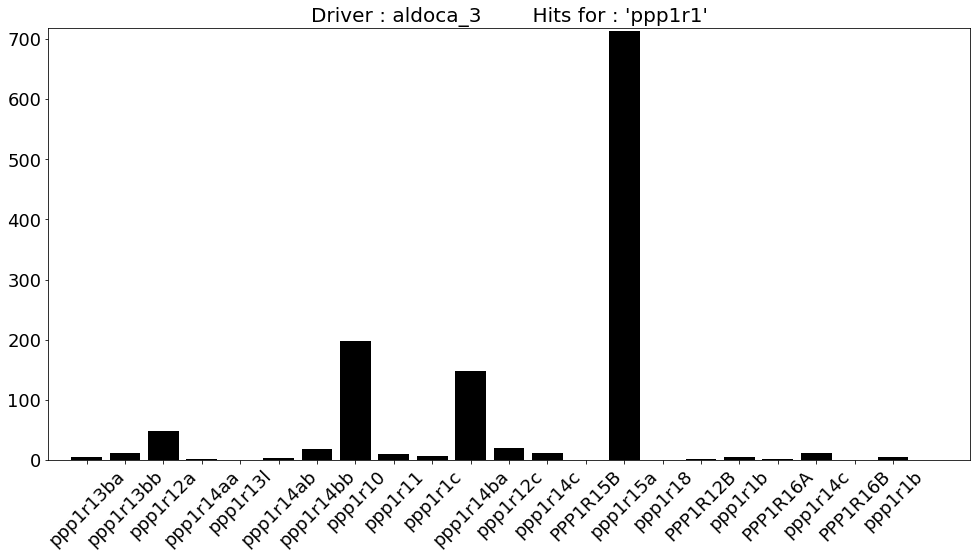

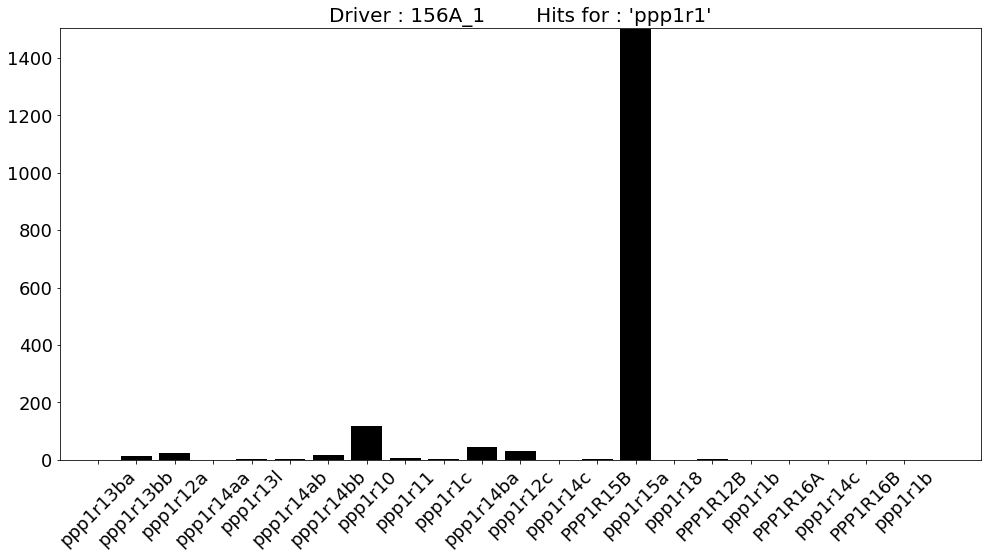

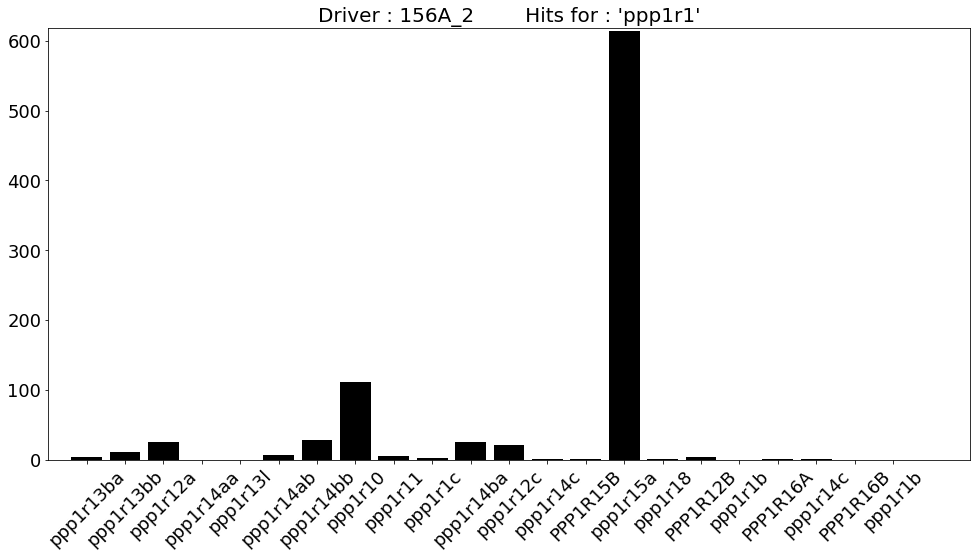

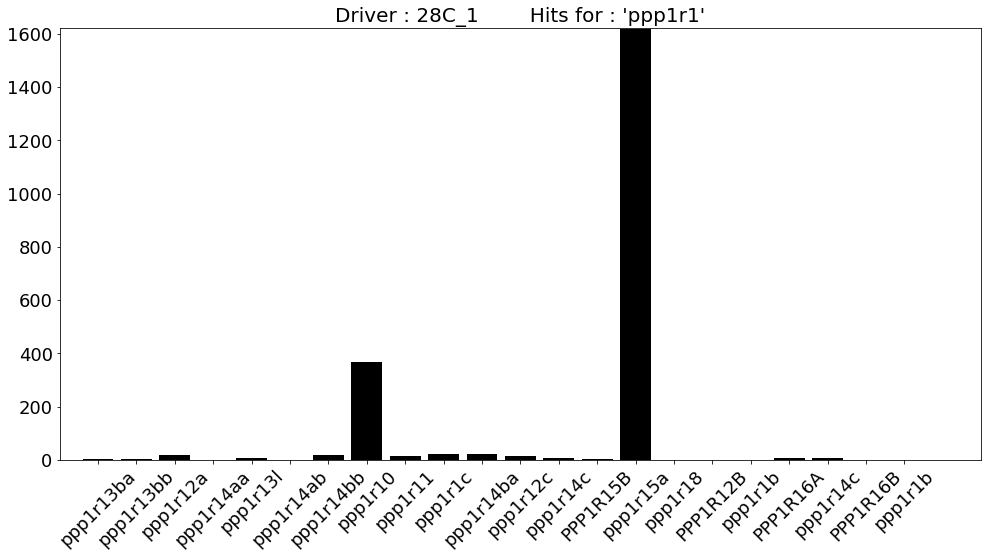

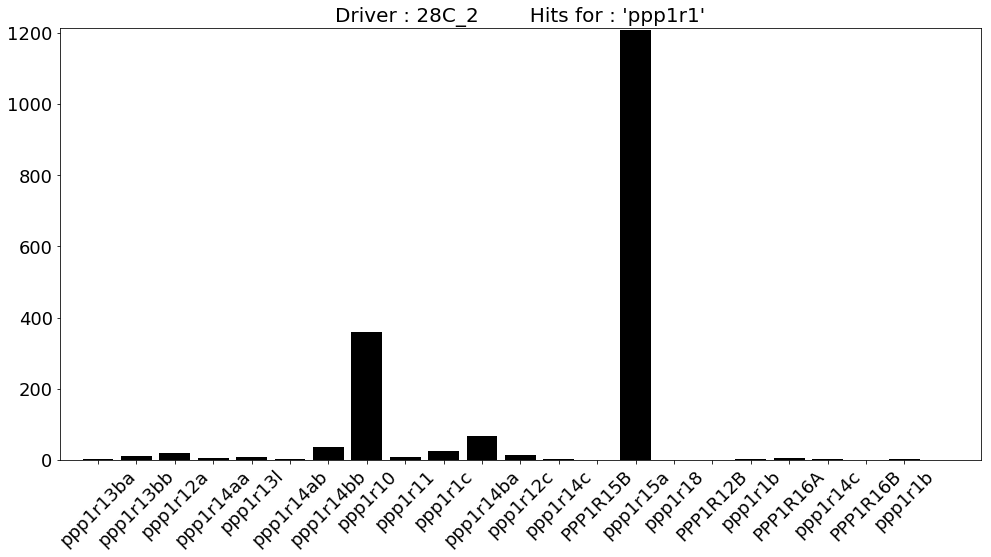

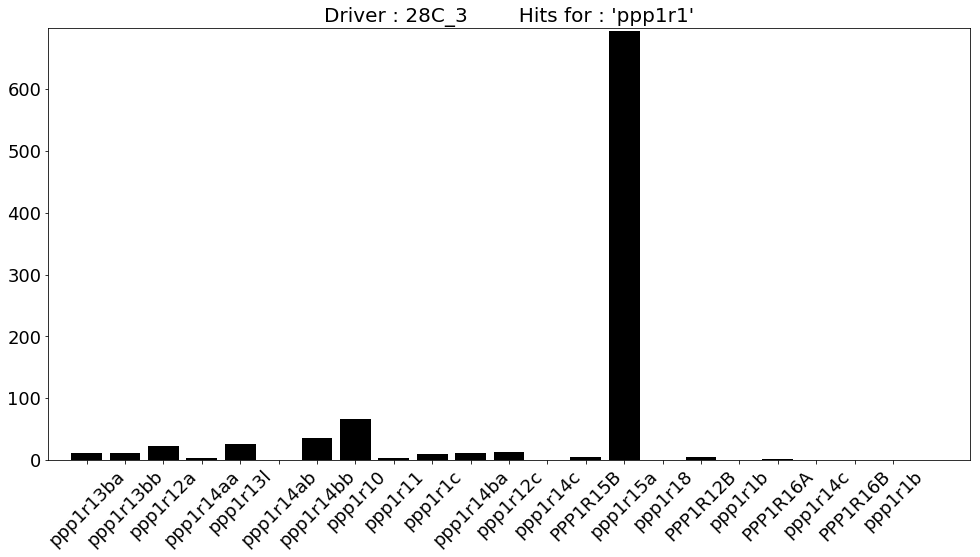

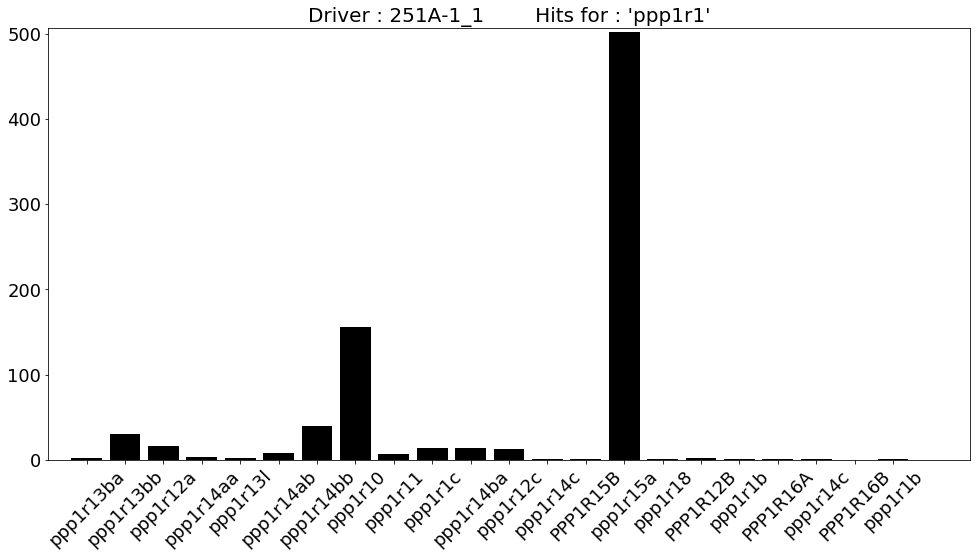

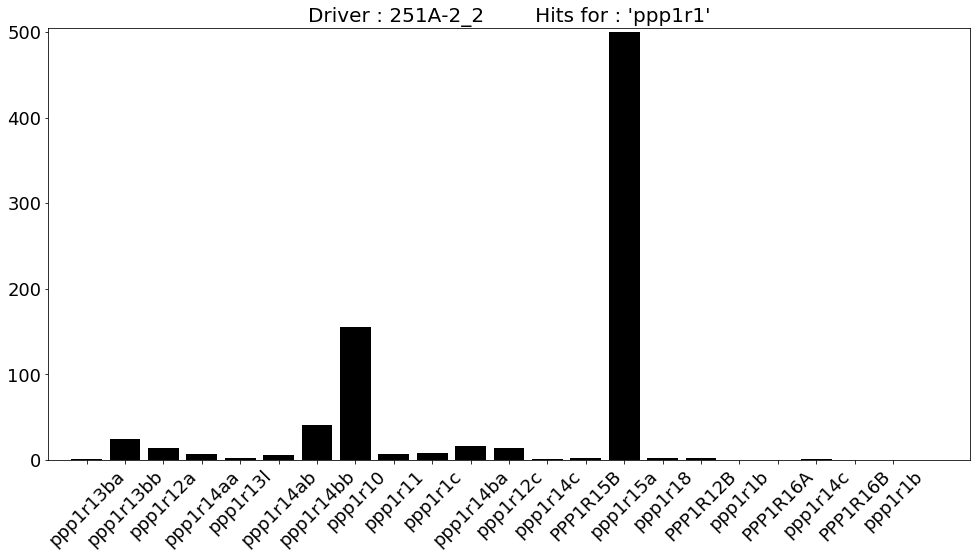

In [5]:
"""PERFORM THE SEARCH AND PULL OUT HITS AND THEIR LOCATION IN THE SHEET"""

if exact_letter_match:
    
    if case_sensitive:
        name=[i for i in Gene_Sym if search_for in " ".join(re.findall("[a-zA-Z]+", str(i))).split()]
        index=[Gene_Sym.index(i) for i in name]
        Gene_of_interest=[(x,y) for x,y in zip(index,name)]
    else:
        name=[i for i in Gene_Sym if search_for.lower() in " "
              .join(re.findall("[a-zA-Z]+", str(i).lower())).split()]
        index=[Gene_Sym.index(i) for i in name]
        Gene_of_interest=[(x,y) for x,y in zip(index,name)]    

else:
    if begin_with:
        
        if case_sensitive:
            name=[i for i in Gene_Sym if str(i).startswith(search_for)]
            index=[Gene_Sym.index(i) for i in name]
            Gene_of_interest=[(x,y) for x,y in zip(index,name)]
        else:
            name=[i for i in Gene_Sym if str(i).lower().startswith(search_for.lower())]
            index=[Gene_Sym.index(i) for i in name]
            Gene_of_interest=[(x,y) for x,y in zip(index,name)]                
        
    else:
        
        if case_sensitive:
            Gene_of_interest=[i for i in enumerate(Gene_Sym) if search_for in str(i)]
        else:        
            Gene_of_interest=[i for i in enumerate(Gene_Sym) if search_for.lower() in str(i).lower()]
    

index_of_interest= [i[0] for i in Gene_of_interest]
name_of_interest=[i[1] for i in Gene_of_interest]
index_in_xlsheet=[i[0]+4 for i in Gene_of_interest]



"""LOAD EXPRESSION DATA FOR ALL THE DRIVERS USED FOR THE SEARCH RESULTS"""
driver_name=[]
data=[]
selected_data=[]
for i in range(2, num_cols-1):
    driver_name.append(worksheet.cell(2,i).value)
    d=[]    
    for ii in range(3,num_rows):
        d.append(worksheet.cell(ii,i).value)
    data.append(d)
    selected_data.append([d[k] for k in index_of_interest])
   
   
"""PLOT EXPRESSION DATA FOR THE GENE OF INTEREST"""
#Separate bar plots are generated for each driver
#Each plot has expression data along y axis and the search hits on the x axis
plt.rcParams['ytick.labelsize'] = 18

for i in range(len(selected_data)):
    
    fig=plt.figure(figsize=[16,8])
    
    ax=fig.add_axes([.1,.15,.8,.75])
    
    plt.title('Driver : '+driver_name[i]+'\tHits for : '.expandtabs()
             +"'"+search_for+"'", fontsize=20)

    x = np.arange(0,len(name_of_interest),1)
    xTicks = name_of_interest
    plt.xticks(x, xTicks,fontsize=18)
    plt.xticks(range(0,len(name_of_interest)), xTicks, rotation=45)
    
    ax.bar(x,selected_data[i],color='black')
    ax.set_ylim(0,max(selected_data[i])+5)
    ax.set_xlim(-1,len(name_of_interest)+1)

    if save:
        plt.savefig(savepath+search_for+'_'+str(i)+'.png', dpi=300)    
    
    
   

# Plot relative expression levels with respect to a driver of interest

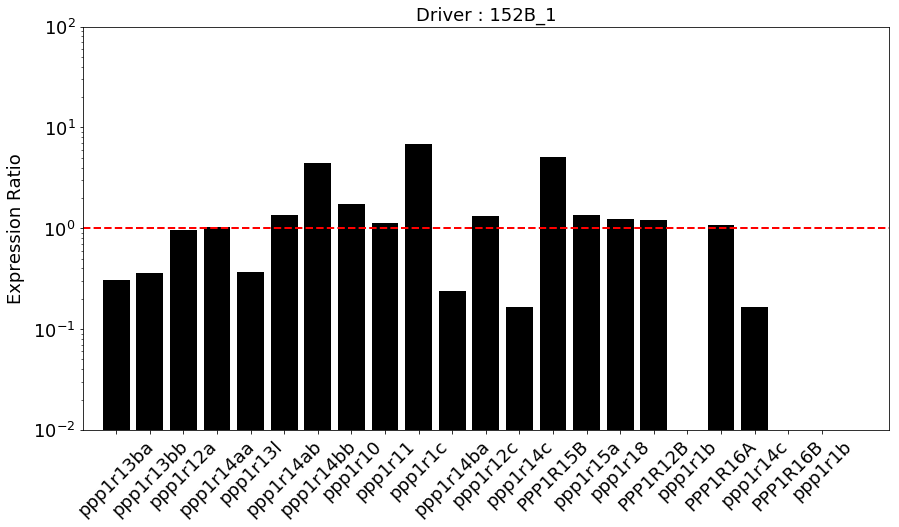

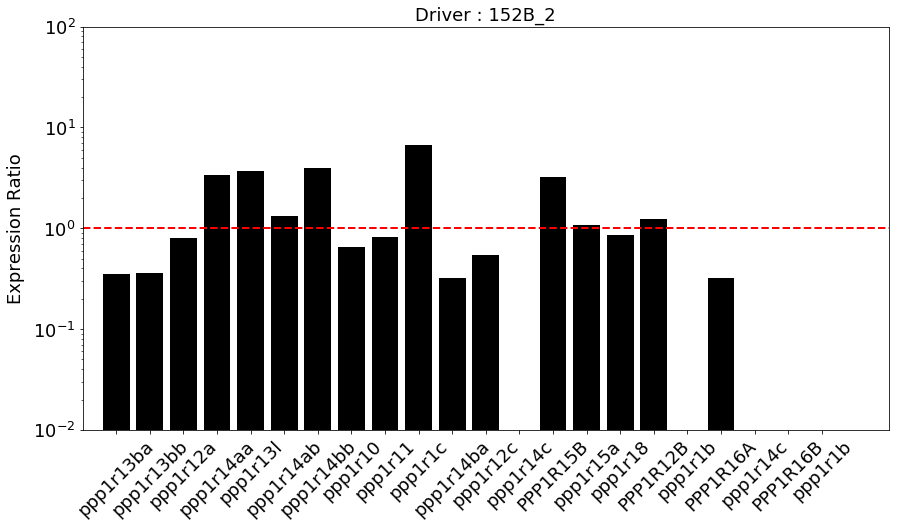

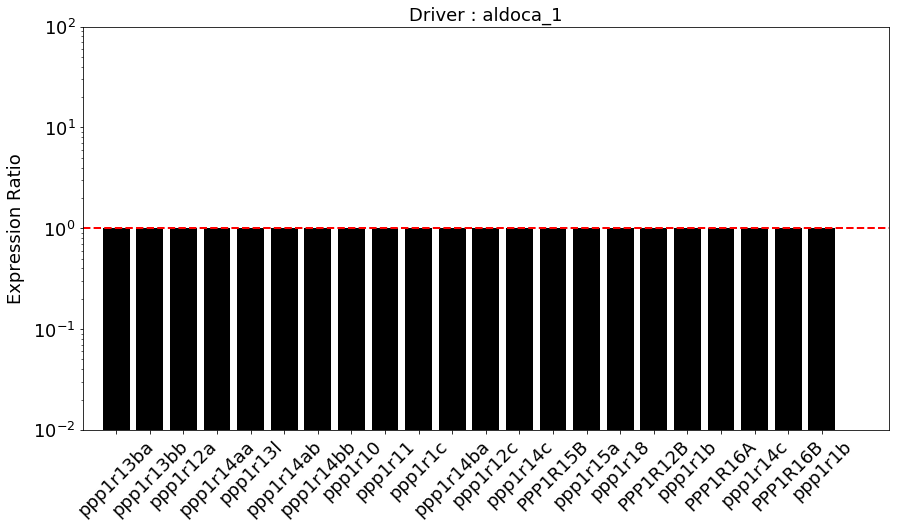

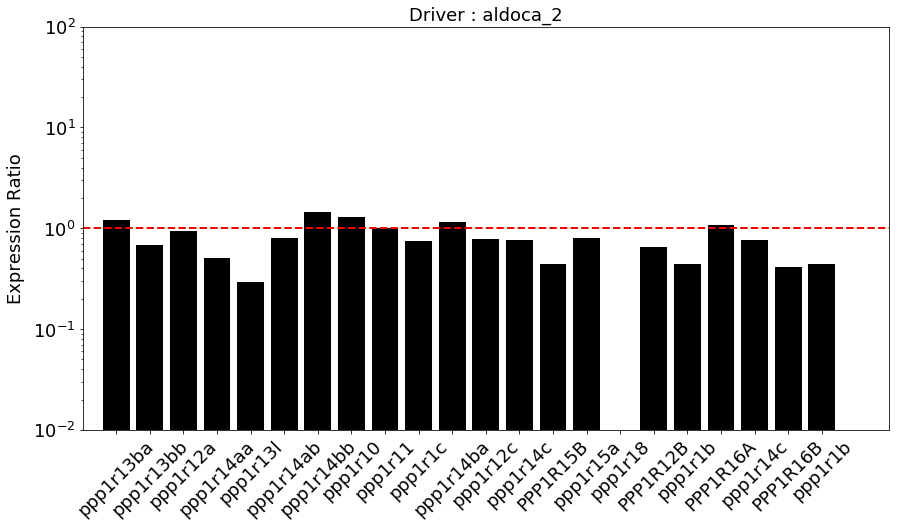

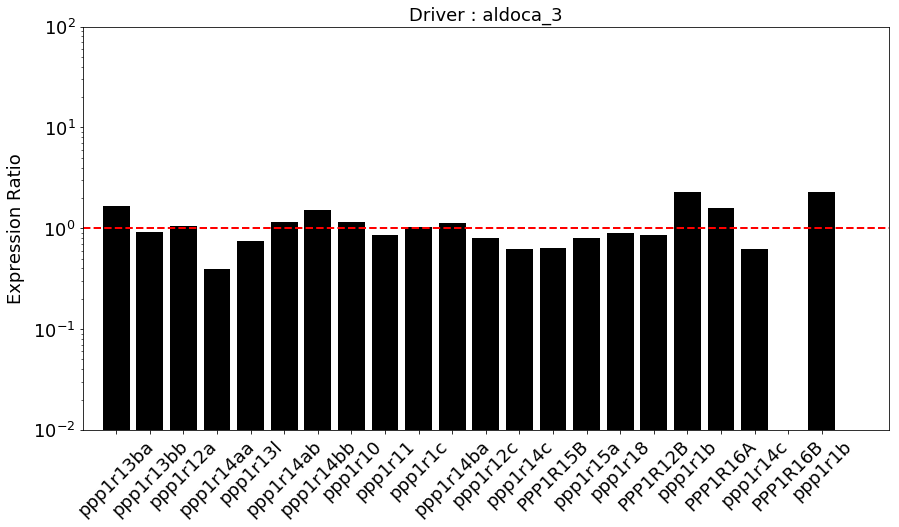

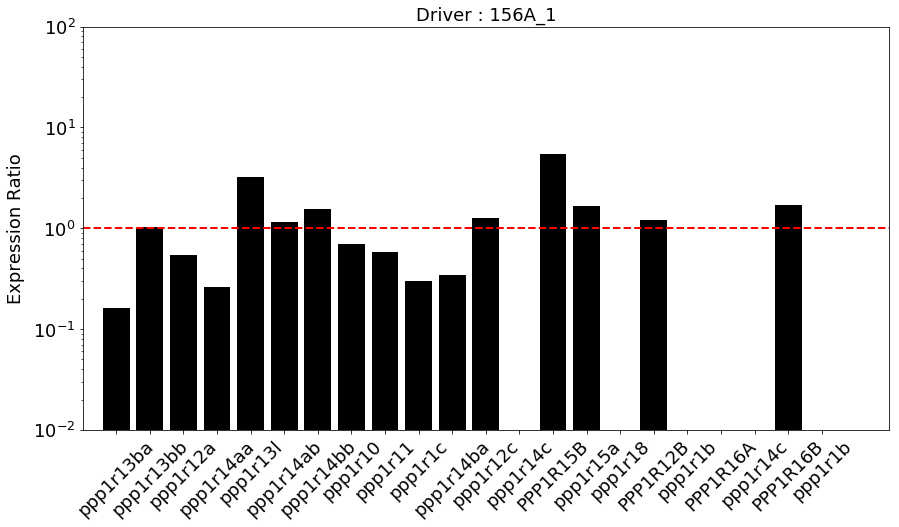

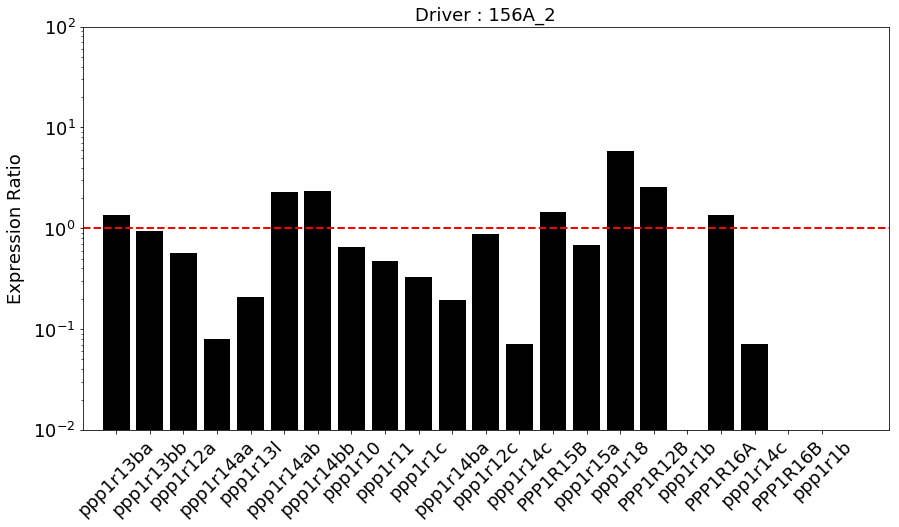

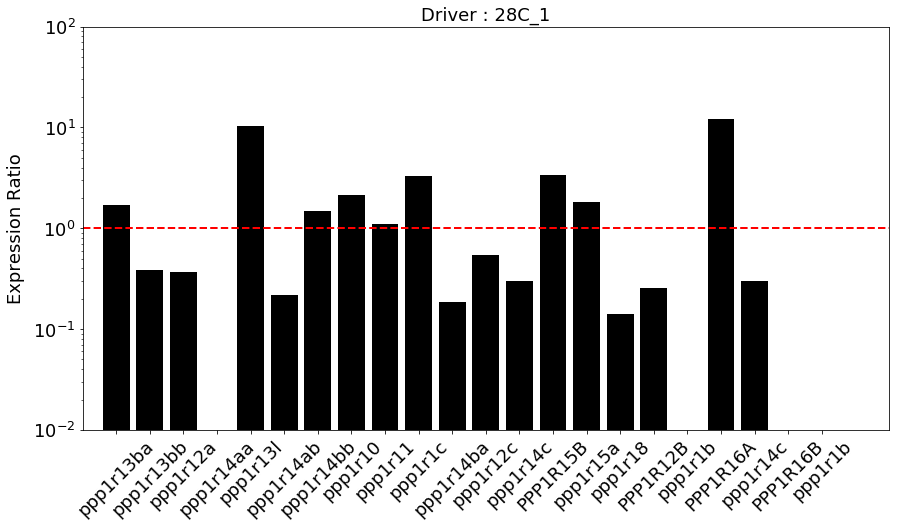

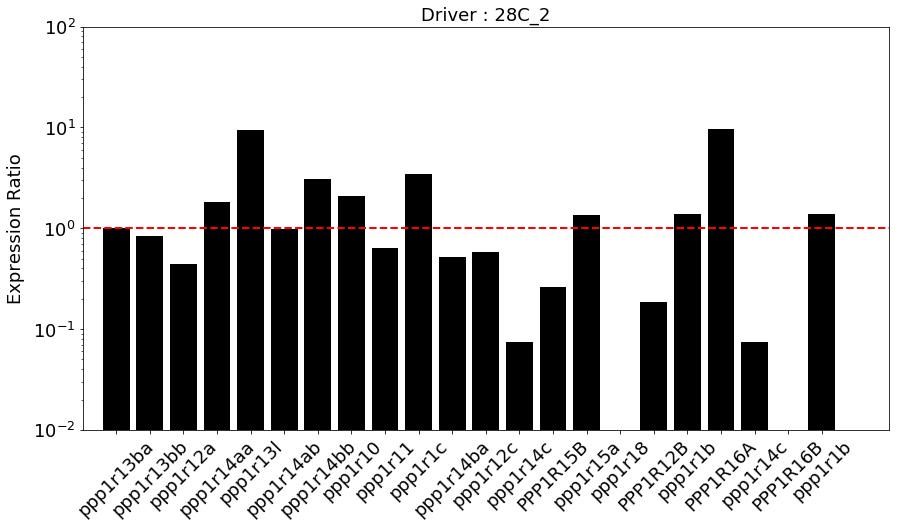

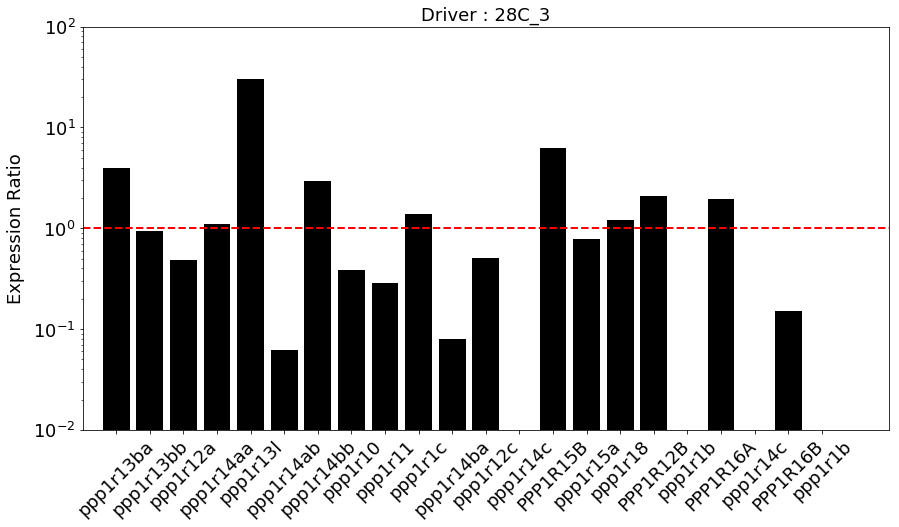

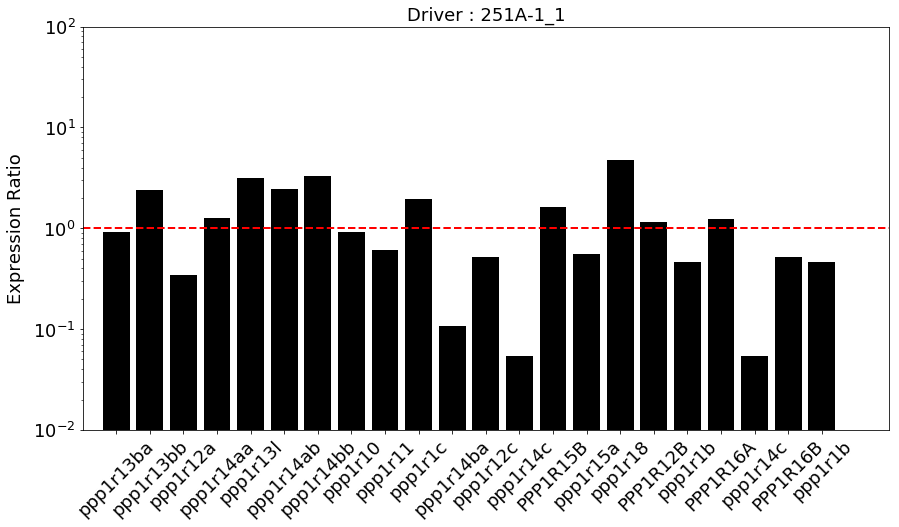

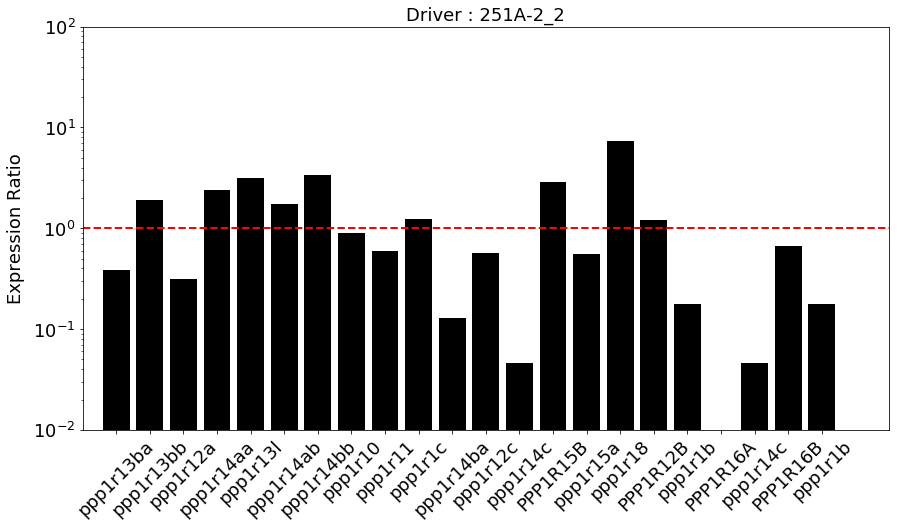

In [6]:
save = False
savepath = "/home/sriram/ncbs/analysis_codes/Hibi_Data/Voltage_Gated_Sodium_Channels/Expression_Ratio_Aldoca/"

driver_of_choice = 'aldoca'

doc_index = []
for dn in range(len(driver_name)):
    if driver_of_choice in driver_name[dn]:
        doc_index.append(dn)
    
    
index_of_expression = []
for i in doc_index:
    ioe = []
    for sd in range(len(selected_data[i])):
        if selected_data[i][sd] != 0:
            ioe.append(sd)
    index_of_expression.append(ioe)


for i in range(len(selected_data)):
    
    exp = selected_data[i]
    exp = [exp[x] for x in index_of_expression[0]]
    
    drv = selected_data[doc_index[0]]
    drv = [drv[x] for x in index_of_expression[0]]
    
    exp_ratio = [x/y for x,y in zip(exp,drv)]
    
    gn = [name_of_interest[x] for x in index_of_expression[0]]

    fig = plt.figure(figsize=[16,8])
    
    ax = fig.add_axes([.2,.2,.7,.7])
    
    plt.title('Driver : '+driver_name[i], fontsize=18)
    
    x = np.arange(0,len(gn),1)
    plt.xticks(x, gn,fontsize=18)
    plt.xticks(range(0,len(gn)), gn, rotation=45)
    plt.xlim(-1,len(gn)+1)
    
    plt.yscale('log')
    plt.ylim(10**-2,10**2)
    plt.ylabel('Expression Ratio', fontsize=18, labelpad = 8)
    
    plt.bar(x,exp_ratio, color = 'black')
    plt.hlines(1,-1,len(gn)+1, linestyle = '--', linewidth = 2, color = 'red')
    
    if save:
        plt.savefig(savepath+'expression_ratio_'+str(i)+'.png', dpi=300)